# <span style="color:lightseagreen">*Culex tarsalis* Reference Genome:<br>Simplifying Orthogroup Functional Descriptions Using Natural language Processing</span>
***
#### 2021 - 2022 Academic Year
***

In [7]:
%%script python3 --bg
import pandas as pd
import numpy as np

import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### <span style="color:lightseagreen">Description Simplification Using Natural Language Toolkit (NLTK)</span>
To find the most frequent descriptions in each orthogroup and to create a test frequency word cloud, Python's NLTK [[1]](https://www.nltk.org/) was used. A frequency table is created for the most common words in the entire collection of orthogroup descriptions. These frequencies are then made into a word cloud.

In [3]:
%%script python3 --bg
ndf = pd.read_csv("For_UniFunc_Part1.tsv", sep='\t')

column_names = ['GeneID','Orthogroup', 'Annotations']#,'Frequency']
sdf = pd.DataFrame(columns = column_names)

indexer = -1
for i in ndf["Descriptions"]:
    indexer += 1
    OG = ndf['Orthogroup'][indexer]
    PA = ndf['ProteinAccession'][indexer]
    AllDesc = ''
    item = i.lower()
    item = item.strip()
    item = item.replace(', , ',', ')
    item = item.strip("''")
    AllDesc += ', '
    AllDesc += item
    AllDesc = AllDesc.strip(',')
    AllDesc = AllDesc.strip()
    t = []
    for x in AllDesc.split(','):
        q = x.strip(',')
        q = q.strip('.')
        w = q.strip()
        if w == '':
            continue
        else:
            t.append(w)
    q = FreqDist(t).most_common(100)
    for a,b in q:
        adder = {'GeneID': PA, 'Orthogroup': OG, 'Annotations': a}#, 'Frequency': b}
        sdf = sdf.append(adder, ignore_index = True)
        
fdf = sdf.drop_duplicates(['Orthogroup','Annotations'],keep= 'first')
aggregation_functions = {'Annotations': ', '.join}#, 'Frequency': 'sum'}
t = fdf.groupby(['GeneID','Orthogroup']).aggregate(aggregation_functions).reset_index(drop=False)

filtered_t = t.sort_values(by=['Orthogroup']).reset_index(level=0, drop=True)
filtered_t.to_csv('GeneID_Orthogroup_Annotations.tsv',index=False, sep='\t')

with open("Adj_GeneID_Orthogroup_Annotations" + ".tsv", "w") as outfile:
    with open("GeneID_Orthogroup_Annotations.tsv") as file:
        for line in file:
            if "'" in line or '"' in line:
                line = line.replace("'","")
                line = line.replace('"','')
                outfile.write(line)
            else:
                outfile.write(line)

In [9]:
pd.read_csv("Adj_GeneID_Orthogroup_Annotations.tsv",sep='\t').head()

,GeneID,Orthogroup,Annotations
0,Davis_tarsalis_mRNA14890,OG0000001,consensus disorder prediction
1,Culex_pipiens_00004994-RA,OG0000002,"tetrahydrofolate dehydrogenase/cyclohydrolase,..."
2,Culex_quinquefasciatus_CPIJ014099-PA,OG0000002,"c-1-tetrahydrofolate synthase, nad(p)-binding ..."
3,Culex_pipiens_00010304-RA,OG0000007,"coil, consensus disorder prediction"
4,Culex_quinquefasciatus_CPIJ008444-PA,OG0000012,consensus disorder prediction


In [5]:
%%script python3 --bg
df = pd.read_csv("Adj_GeneID_Orthogroup_Annotations.tsv",sep='\t')
text = ",".join(Annotations for Annotations in df.Annotations)
text = text.replace("'","")
text = text.replace('"','')
stopwords = set(STOPWORDS)
stopwords.update(["unknown", "consensus disorder prediction"])

wordcloud = WordCloud(mode="RGBA", width = 15000, height = 10000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig("SimpleWC.png", format="png")

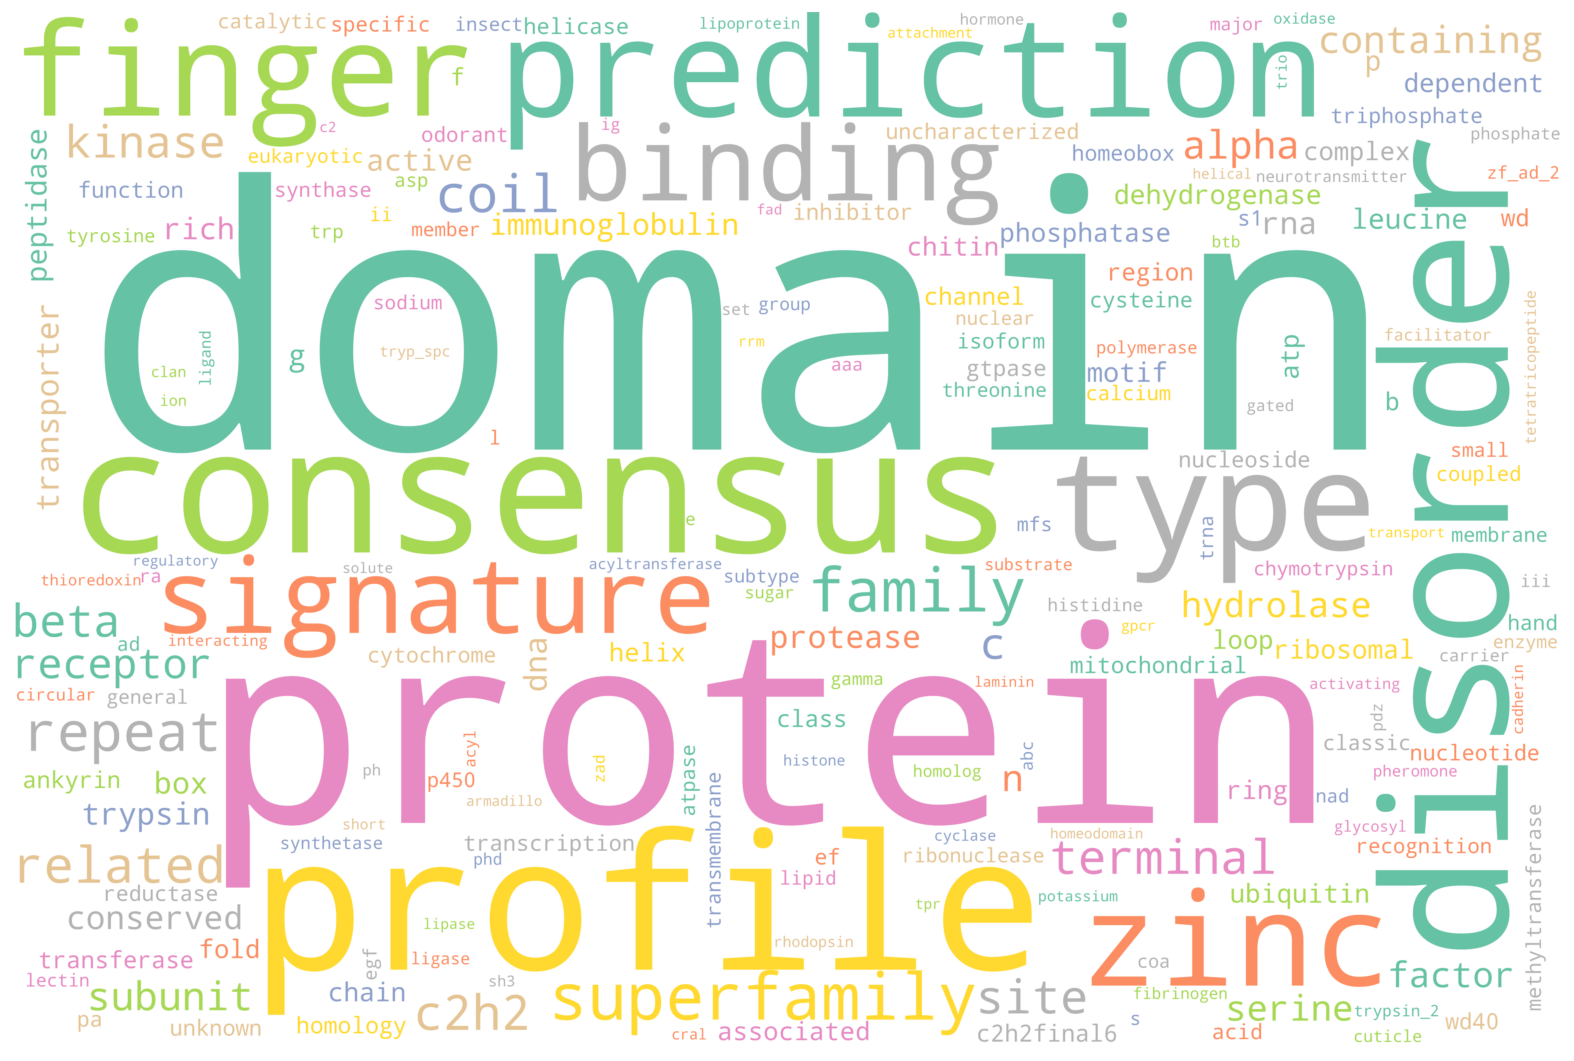

***
### <span style="color:lightseagreen">References</span>
[1] Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc. https://www.nltk.org/